# Instalaciones

In [1]:
install.packages("ggbiplot")
install.packages("randomForest")
install.packages("kernlab")
install.packages("xgboost")
install.packages("caret")
install.packages("cluster")
install.packages("e1071")
library(e1071)
library(cluster)
library(ggbiplot)
library(caret)
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice

randomForest 4.7-1.2

Type rfNe

# Preprocesamiento y visualizaciones

Se analiza el conjunto de datos [Air Quality and Pollution Assessment](https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment).
Contiene 5000 muestras que capturan factores medioambientales y demográficos que tienen que ver con la contaminación del aire en distintas regiones.

A continuación se describe cada variable con su significado:
- Temperature (°C): Temperatura promedio de la región.
- Humidity (%): Humedad relativa de la región.
- PM2.5 Concentration (µg/m³): Material particulado de diámetro menor a 2.5 micrómetros.
- PM10 Concentration (µg/m³): Material particulado de diámetro menor a 10 micrómetros.
- NO2 Concentration (ppb): Niveles de dióxido de nitrógeno.
- SO2 Concentration (ppb): Niveles de dióxido de azufre.
- CO Concentration (ppm): Niveles de monóxido de carbono.
- Proximity to Industrial Areas (km): Distancia a la zona industrial más cercana.
- Population Density (people/km²): Número de personas por kilómetro cuadrado en la región.

Clase target (Air Quality Levels):
- Good: Aire limpio con bajos niveles de contaminación.
- Moderate: Calidad de aire aceptable, pero con presencia de algunos contaminantes.
- Poor: Contaminación notable que puede causar problemas de salud en grupos sensibles.
- Hazardous: Aire altamente contaminado que representa serios riesgos para la salud de la población.

Notar que hay distintos tipos de indicadores de la calidad del aire. Aquellos que se podrían llamar "directos", que miden qué hay en las partículas del aire (PMs, CO, NO2, SO2) y otros que son más "indirectos" como la cercanía a zonas industriales. Dentro de los indicadores directos, hay [distintas formas en que estos afectan la calidad del aire](https://www.who.int/teams/environment-climate-change-and-health/air-quality-and-health/health-impacts/types-of-pollutants). Por ejemplo las partículas PM, formadas por polvo o humo, pueden indicar zonas de construcción o incendios. Mientras que, por ejemplo, el CO proviene principalmente de emisiones de vehículos.

In [2]:
data <- read.csv("/content/updated_pollution_dataset.csv")

In [3]:
head(data)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air.Quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
2,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
3,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
4,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
5,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
6,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous


In [4]:
table(data$Air.Quality)


     Good Hazardous  Moderate      Poor 
     2000       500      1500      1000 

In [5]:
summary(data)

  Temperature       Humidity          PM2.5             PM10       
 Min.   :13.40   Min.   : 36.00   Min.   :  0.00   Min.   : -0.20  
 1st Qu.:25.10   1st Qu.: 58.30   1st Qu.:  4.60   1st Qu.: 12.30  
 Median :29.00   Median : 69.80   Median : 12.00   Median : 21.70  
 Mean   :30.03   Mean   : 70.06   Mean   : 20.14   Mean   : 30.22  
 3rd Qu.:34.00   3rd Qu.: 80.30   3rd Qu.: 26.10   3rd Qu.: 38.10  
 Max.   :58.60   Max.   :128.10   Max.   :295.00   Max.   :315.80  
      NO2             SO2              CO       Proximity_to_Industrial_Areas
 Min.   : 7.40   Min.   :-6.20   Min.   :0.65   Min.   : 2.500               
 1st Qu.:20.10   1st Qu.: 5.10   1st Qu.:1.03   1st Qu.: 5.400               
 Median :25.30   Median : 8.00   Median :1.41   Median : 7.900               
 Mean   :26.41   Mean   :10.01   Mean   :1.50   Mean   : 8.425               
 3rd Qu.:31.90   3rd Qu.:13.72   3rd Qu.:1.84   3rd Qu.:11.100               
 Max.   :64.90   Max.   :44.90   Max.   :3.72   Max.   :

Al realizar un simple resumen de las columnas del dataset se puede ver que PM10 y SO2 tienen valores mal formados porque nunca pueden ser negativos. Dichas filas serán eliminadas.

In [6]:
num_negative_SO2 <- sum(data$SO2 < 0, na.rm = TRUE)
num_negative_PM10 <- sum(data$PM10 < 0, na.rm = TRUE)

cat("Número de filas con SO2 negativo:", num_negative_SO2, "\n")
cat("Número de filas con PM10 negativo:", num_negative_PM10, "\n")

Número de filas con SO2 negativo: 30 
Número de filas con PM10 negativo: 1 


In [7]:
data <- data[data$SO2 >= 0 & data$PM10 >= 0, ]

Además se chequea la presencia de NAs.

In [8]:
sum(is.na(data))

[1] 0

Se transforma la clase target a "factor".

In [9]:
data$Air.Quality <- as.factor(data$Air.Quality)

A continuación se realizan gráficos para cada variable. Se analiza la distribución de cada una mediante histogramas y la relación con la clase target con boxplots.

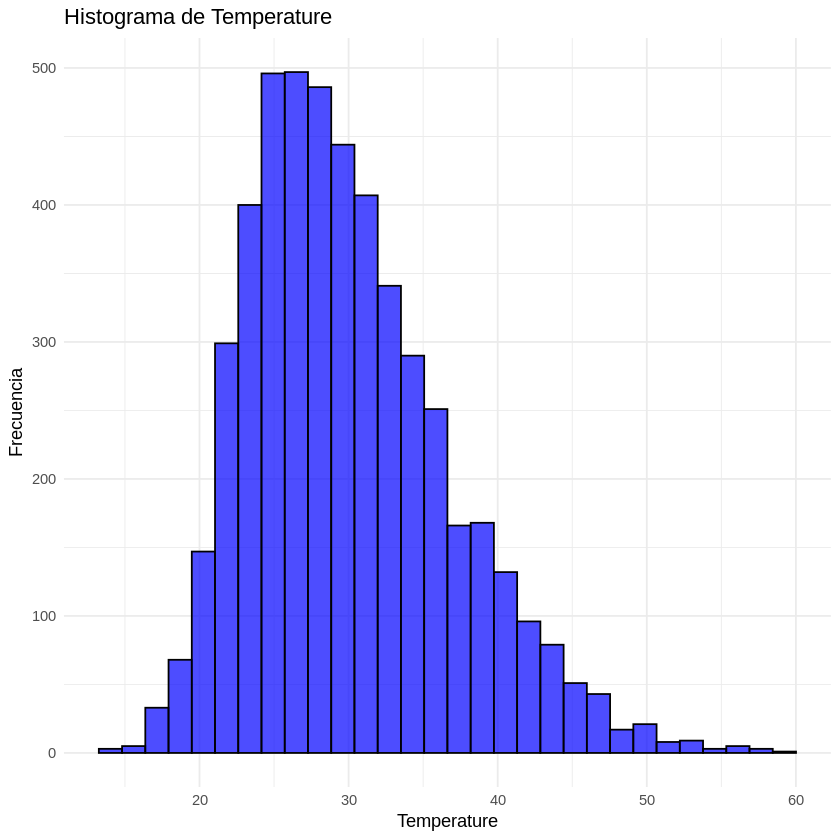

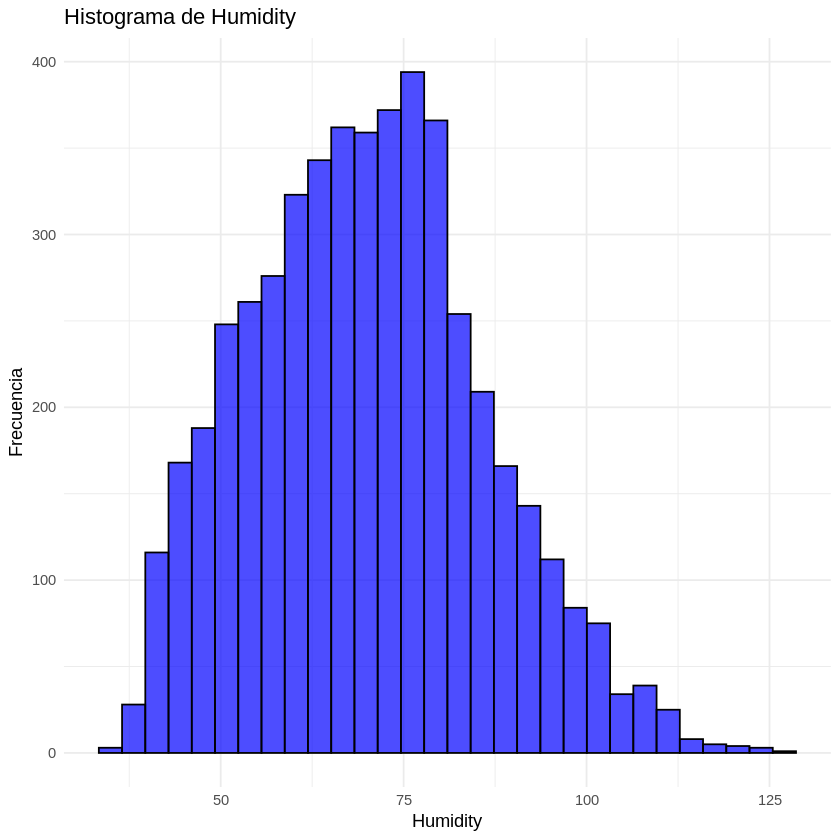

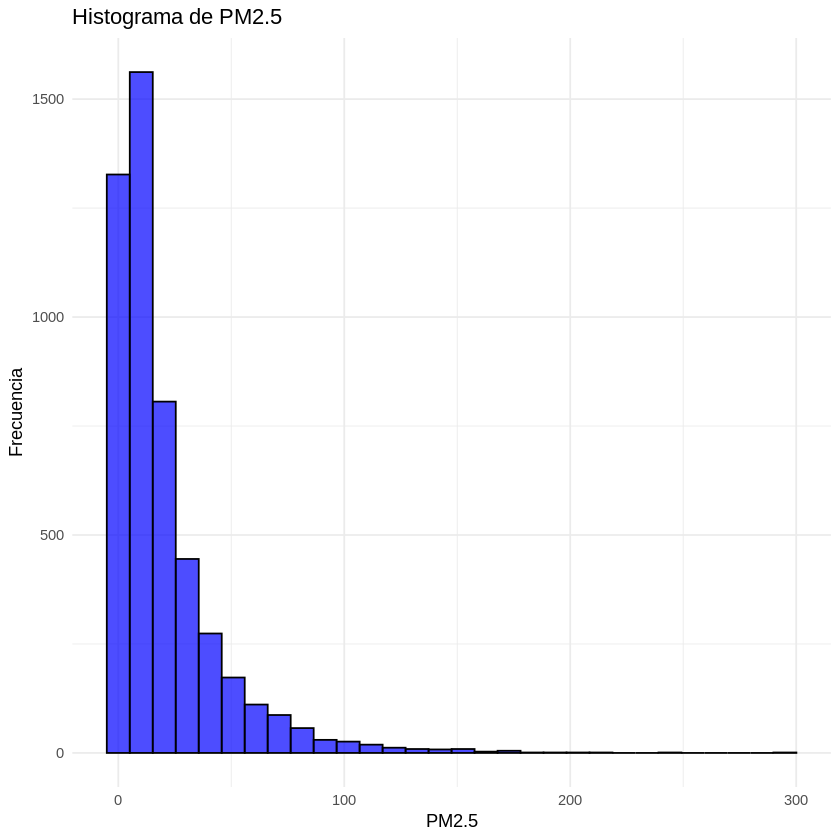

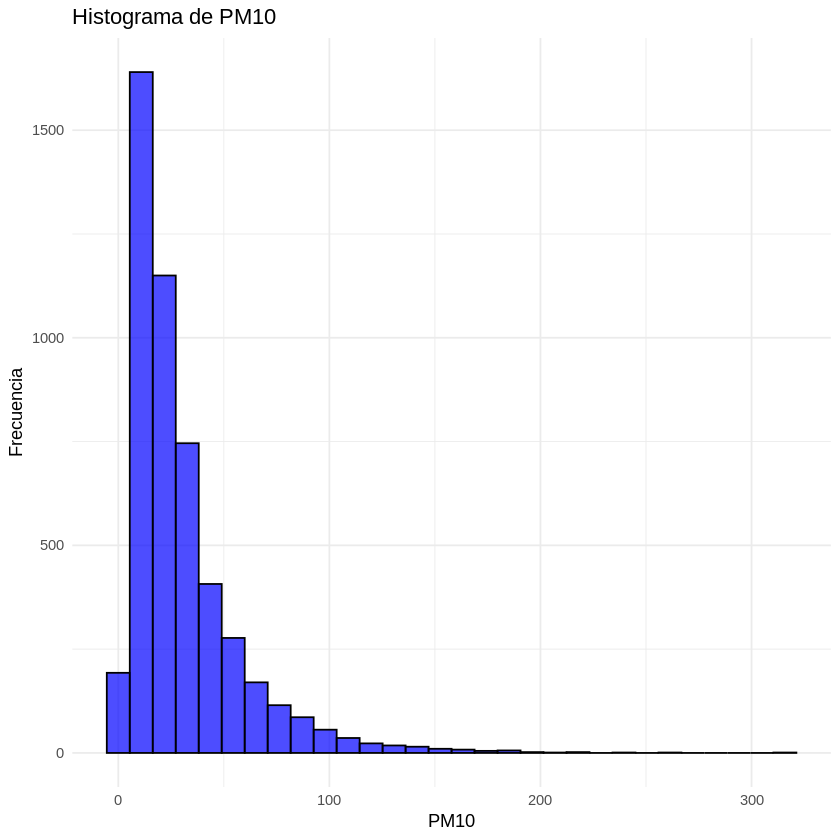

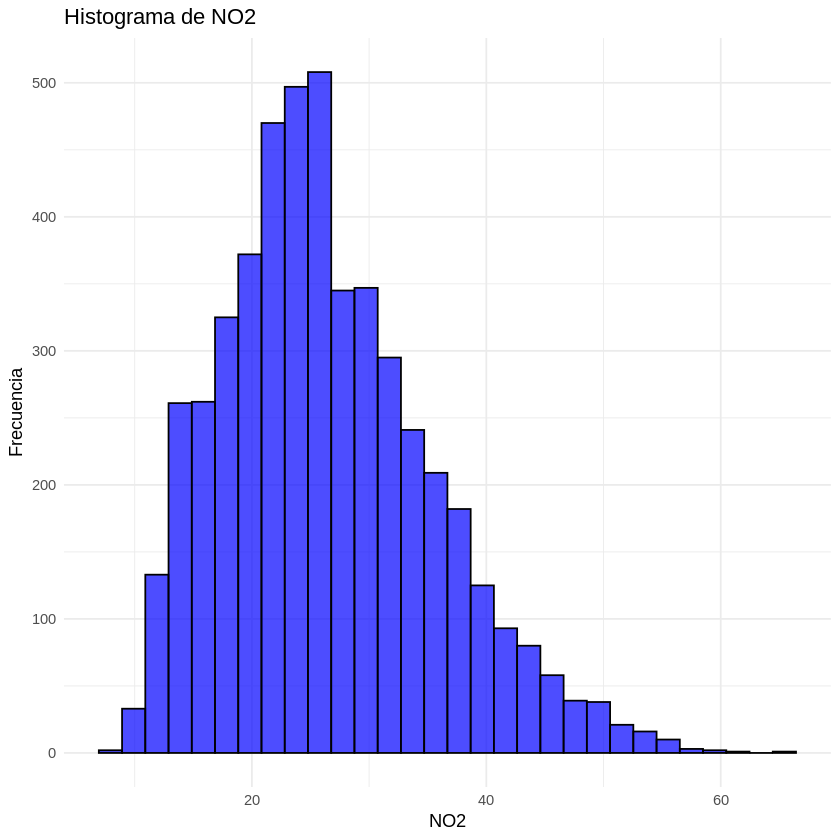

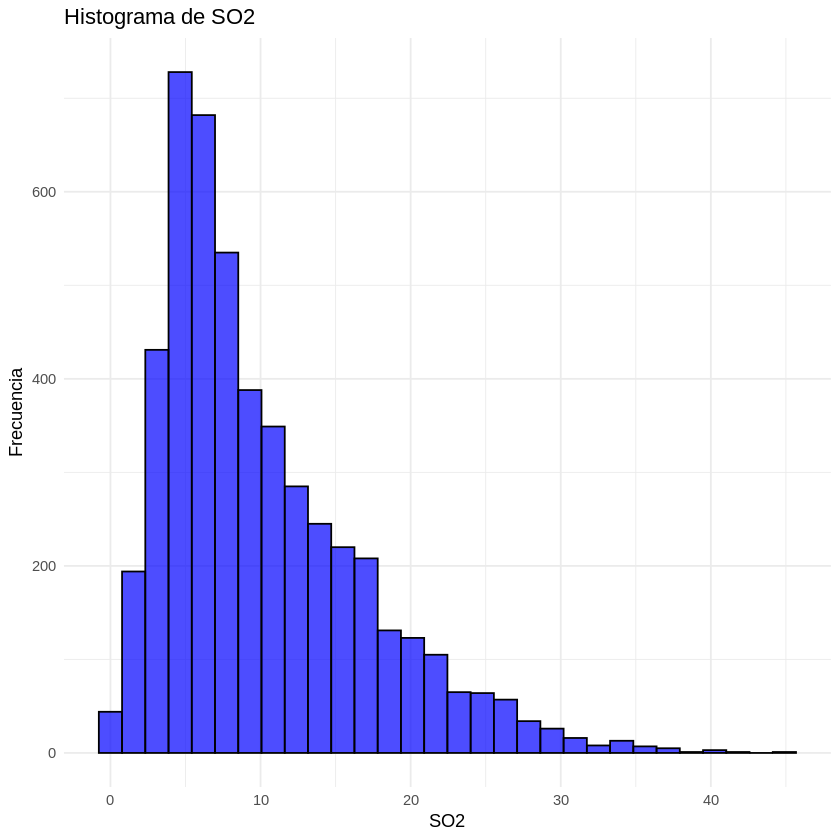

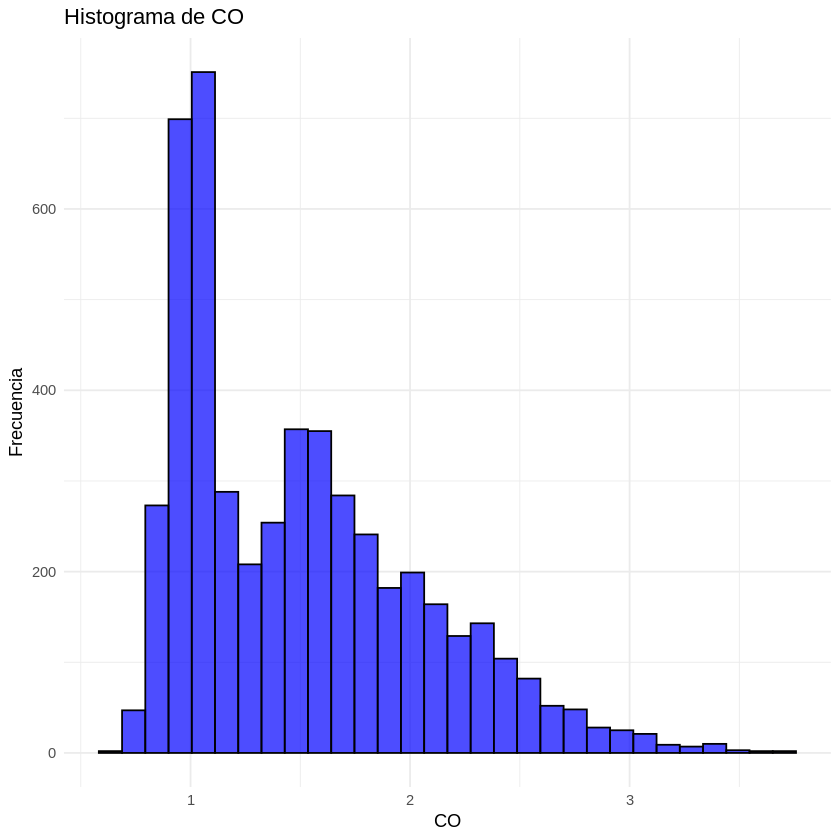

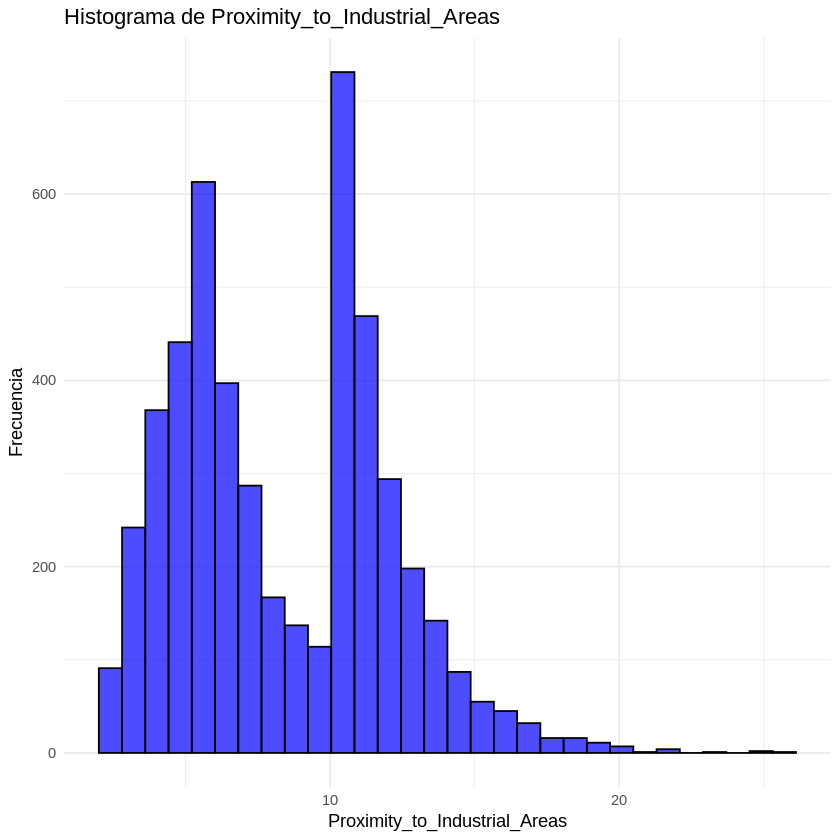

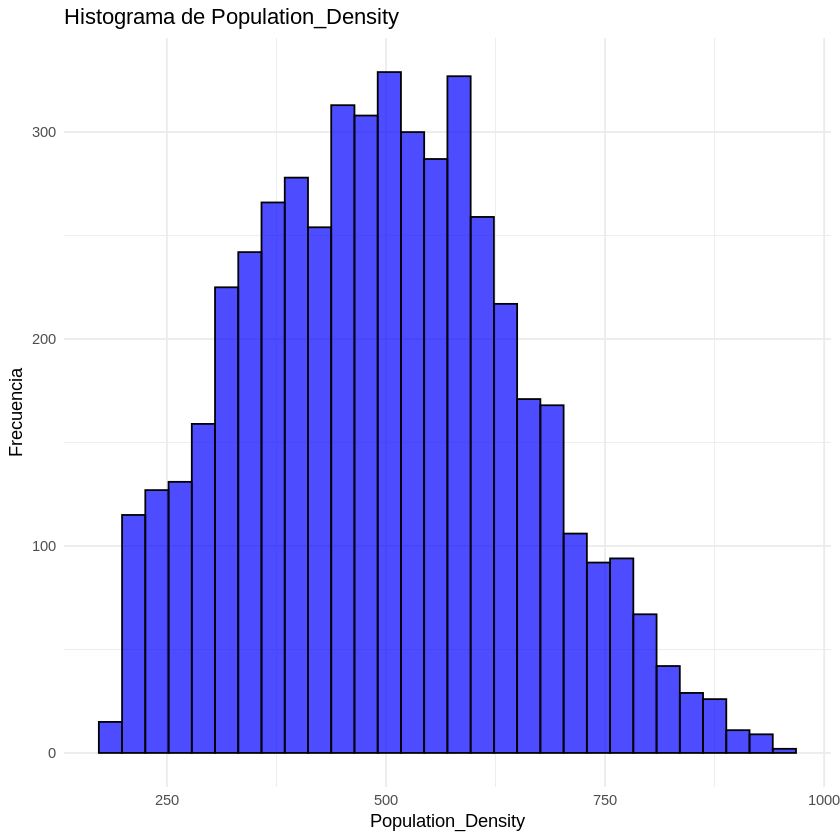

In [10]:
for (col_name in colnames(data[,-10])) {
  column_data <- data.frame(Value = data[[col_name]])

  p <- ggplot(column_data, aes(x = Value)) +
    geom_histogram(bins = 30, color = "black", fill = "blue", alpha = 0.7) +
    labs(
      title = paste("Histograma de", col_name),
      x = col_name,
      y = "Frecuencia"
    ) +
    theme_minimal()

  print(p)
}

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


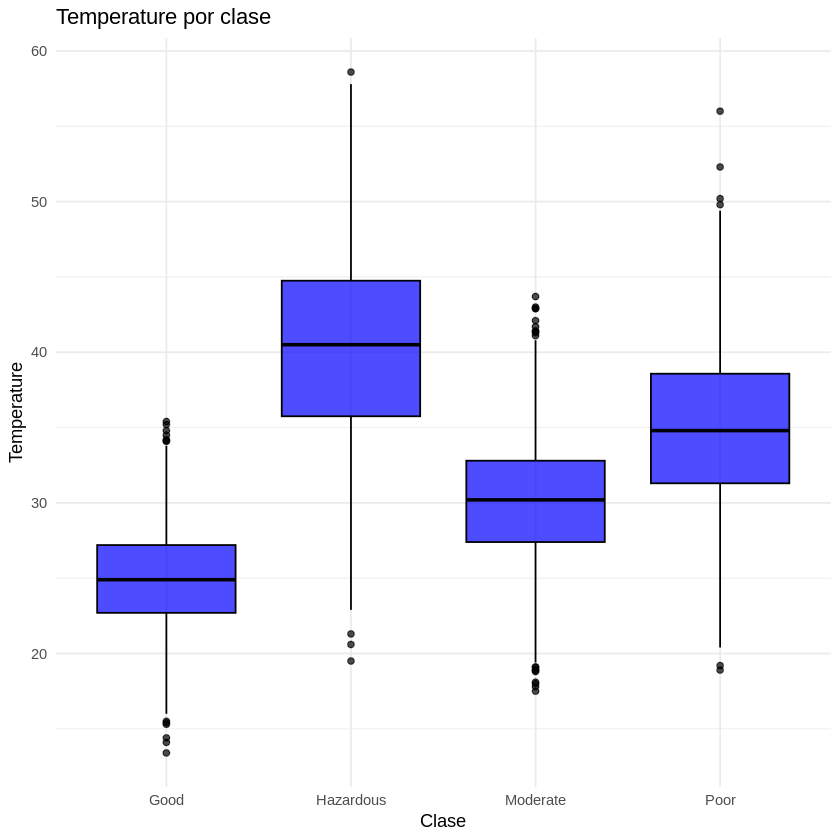

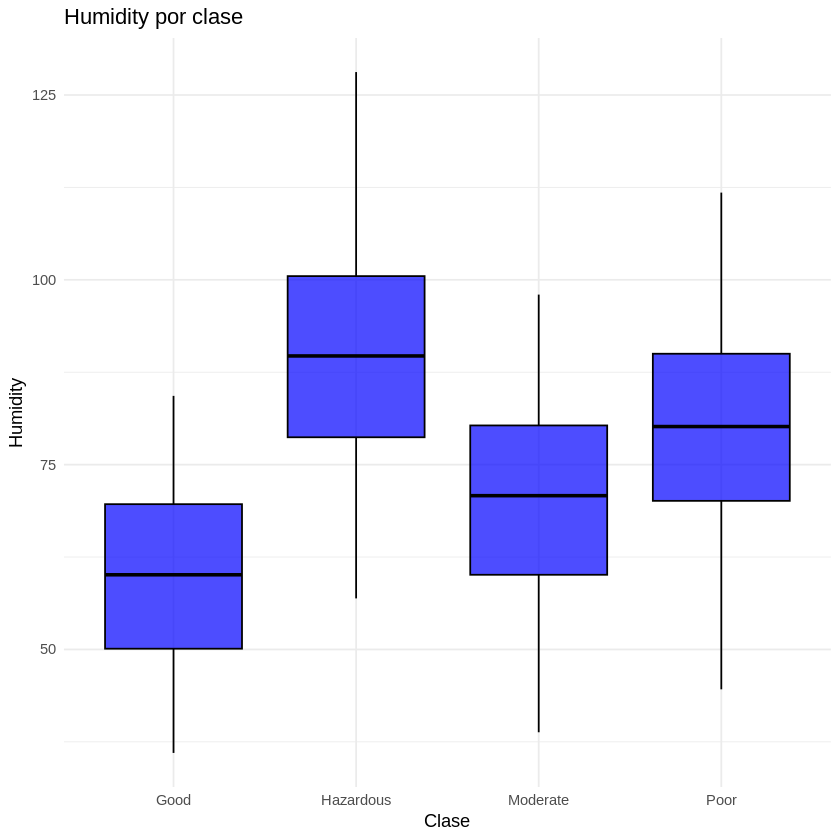

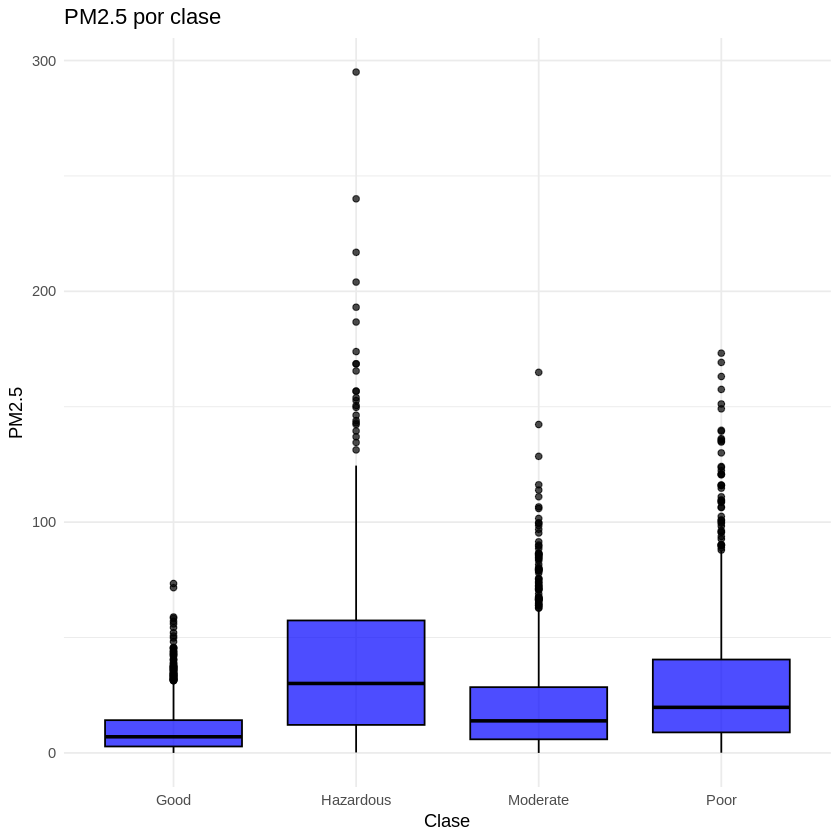

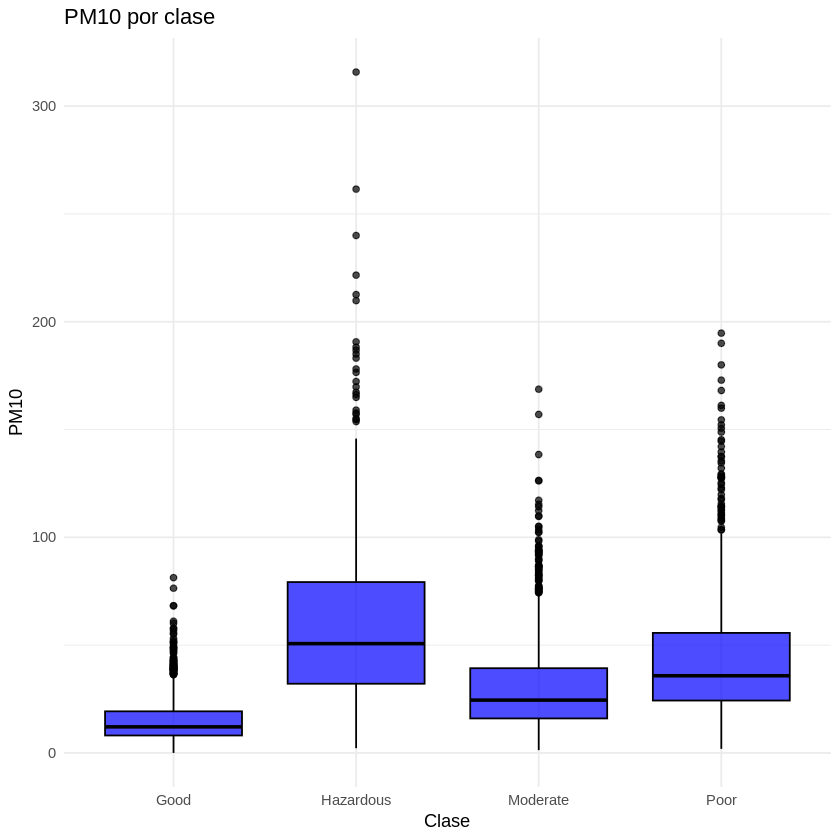

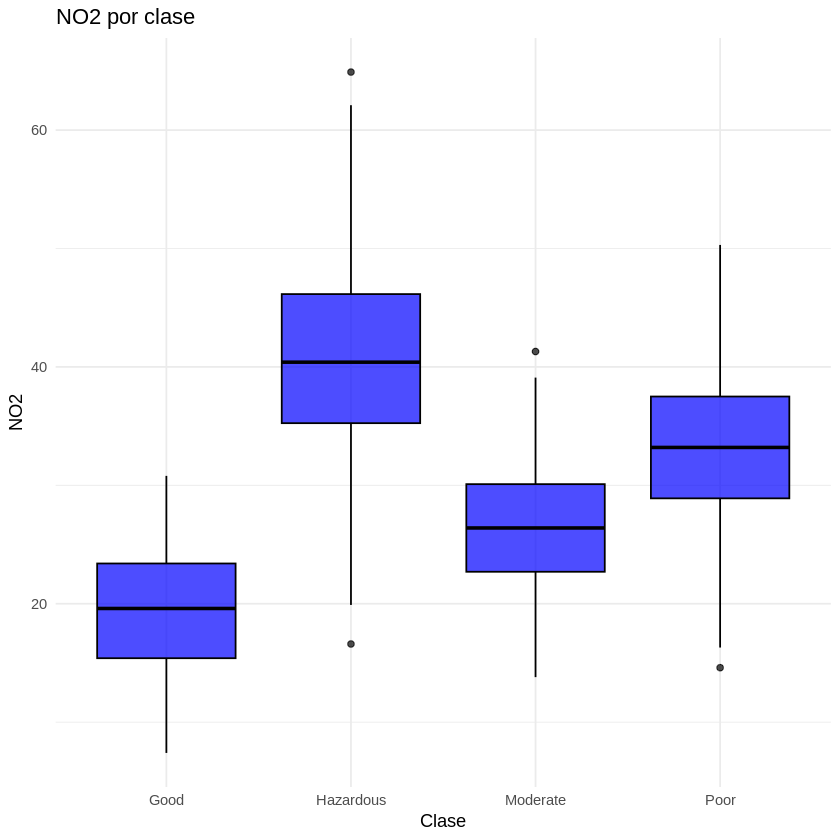

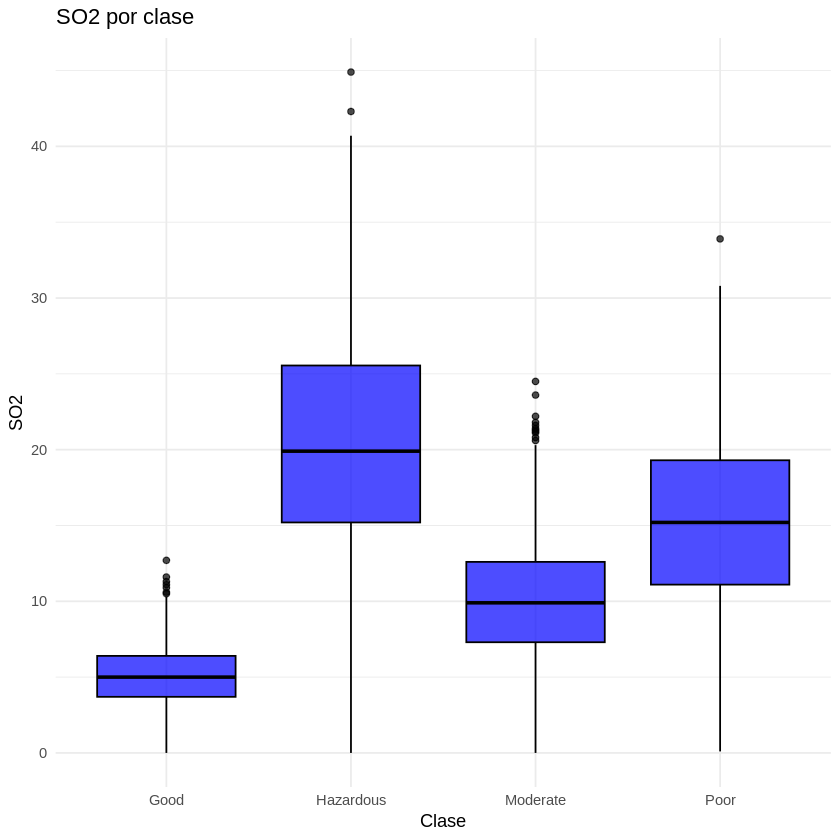

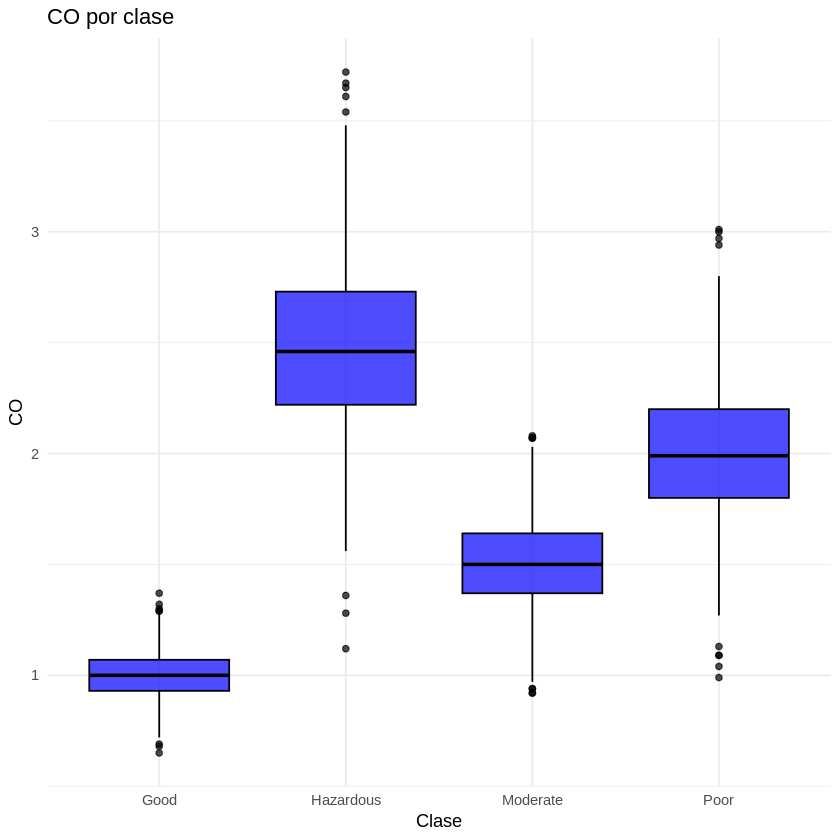

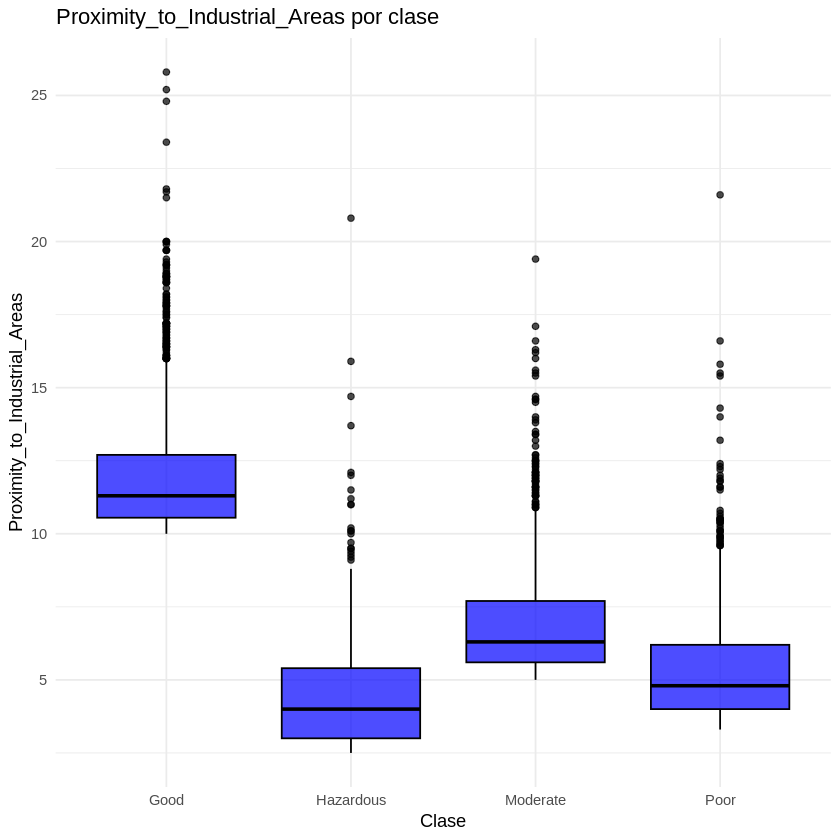

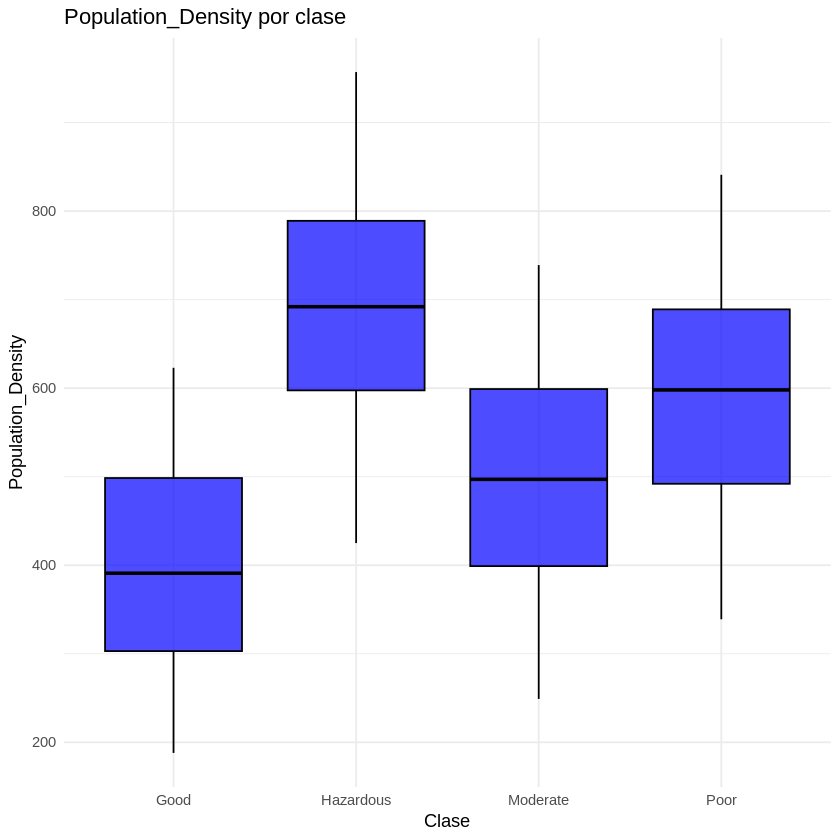

In [11]:
for (col_name in names(data[,-10])) {

  plot <- ggplot(data = data.frame(data[,-10], class = data[,10]), aes_string(x = "class", y = col_name)) +
    geom_boxplot(fill = "blue", color = "black", alpha = 0.7) +
    labs(title = paste(col_name, "por clase"),
         x = "Clase",
         y = col_name) +
    theme_minimal()

  print(plot)
}


De todas estas visualizaciones se pueden destacar varias cosas:
- La mayoría de las variables tienen distribuciones normales. Incluso en algunas de ellas, como CO, se pueden distinguir más de una normal. Esto, junto a su boxplot correspondiente, da un indicio de que esas variables separan las clases.
- Las variables pertenecientes a los PMs parecieran seguir una distribución exponencial. Además, en sus boxplots, se puede ver que dentro de la clase Hazardous hay rangos demasiado grandes, haciendo que muchos puntos queden como outliers. Es por esto que se realizará una transformación logarítmica a dichas variables.

In [12]:
data$`PM2.5` <- log(data$`PM2.5`+1)
data$PM10 <- log(data$PM10+1)

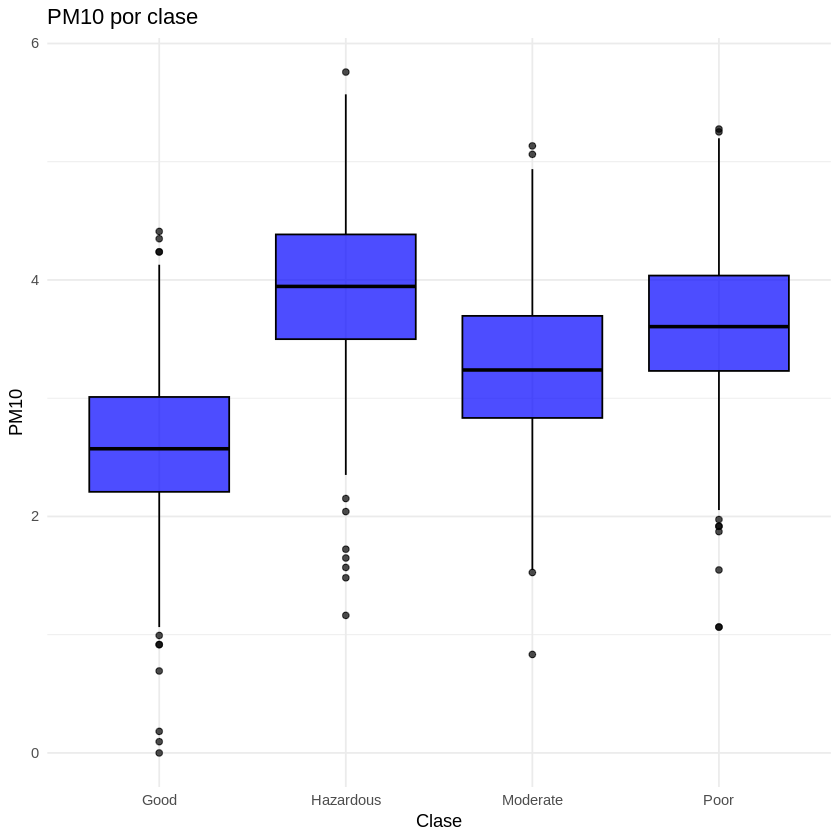

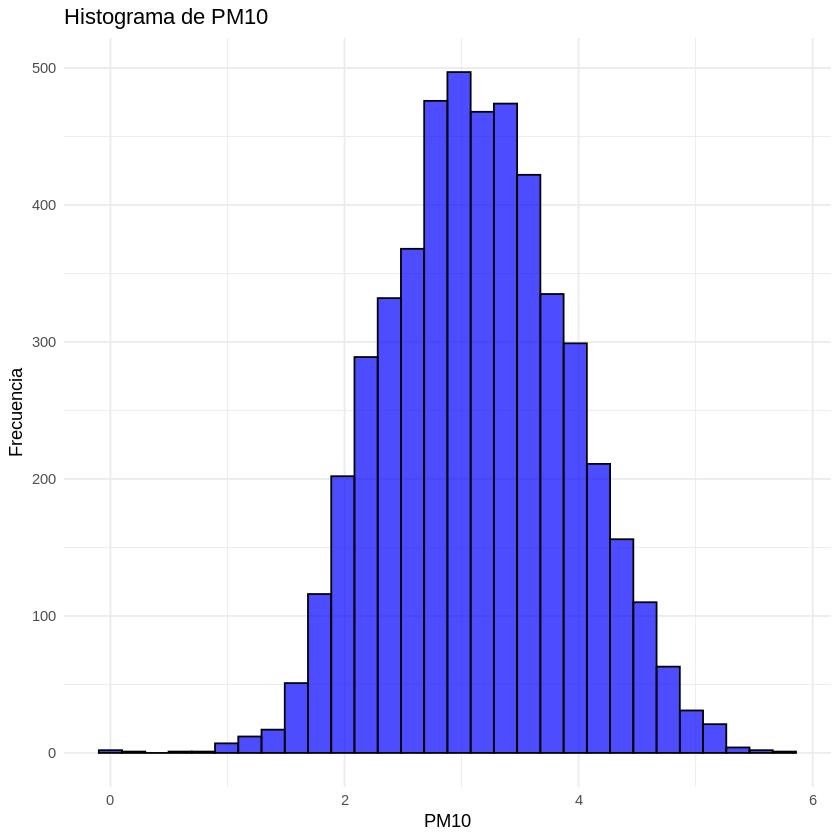

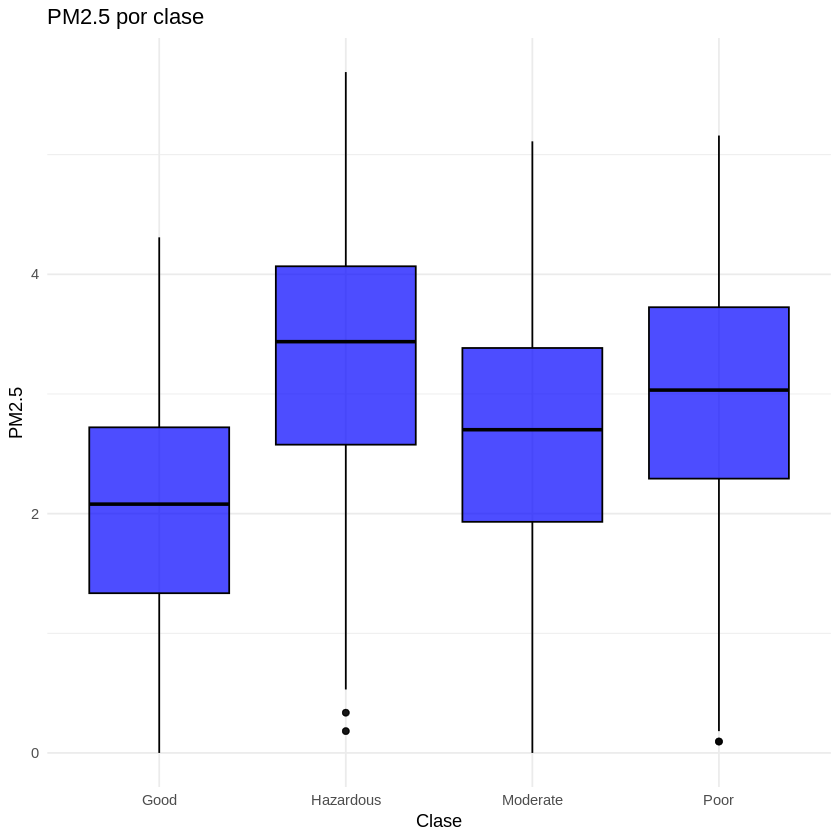

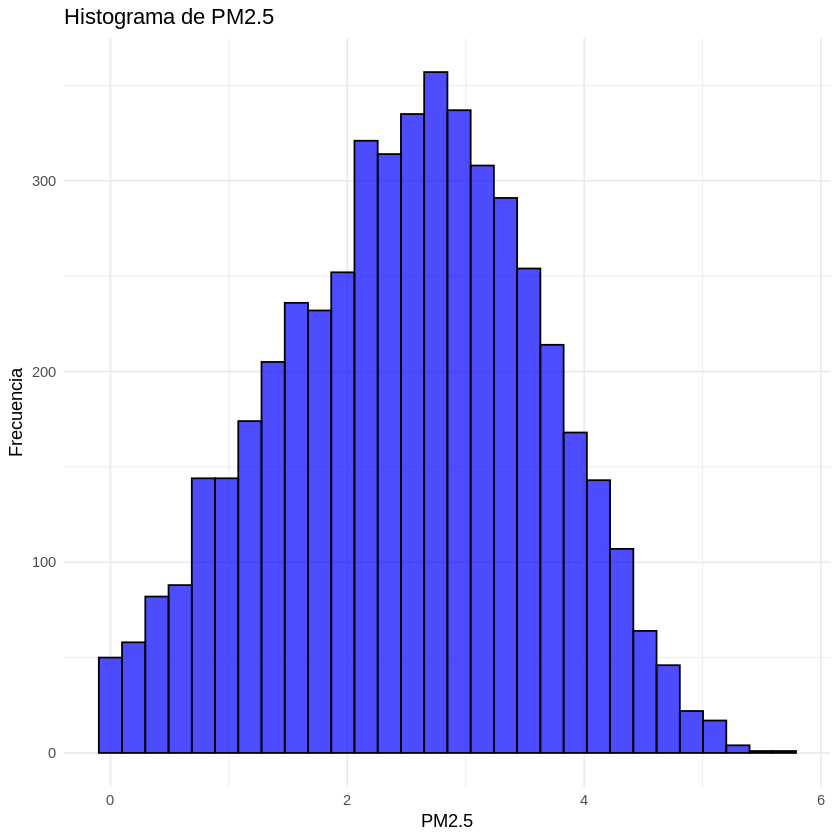

In [13]:
for (col_name in c("PM10", "PM2.5")) {
  plot <- ggplot(data = data.frame(data, class = data[,10]), aes_string(x = "class", y = col_name)) +
    geom_boxplot(fill = "blue", color = "black", alpha = 0.7) +
    labs(title = paste(col_name, "por clase"),
         x = "Clase",
         y = col_name) +
    theme_minimal()

  print(plot)

  column_data <- data.frame(Value = data[[col_name]])
  p <- ggplot(column_data, aes(x = Value)) +
    geom_histogram(bins = 30, color = "black", fill = "blue", alpha = 0.7) +
    labs(
      title = paste("Histograma de", col_name),
      x = col_name,
      y = "Frecuencia"
    ) +
    theme_minimal()

  print(p)
}

Luego de realizar la transformación, se obtienen datos normales que facilitarán la búsqueda de clusters y proyecciones. En cuanto a predecir la clase, se ve que estas variables consiguen separar los valores Good y Hazardous, que son los extremos, pero los dos valores intermedios (Poor y Moderate) están muy mezclados.

A continuación se divide el dataframe en variables y clase.

In [14]:
data.x <- data[,-10]
data.y <- data[,10]

Scatterplot de a 2 variables



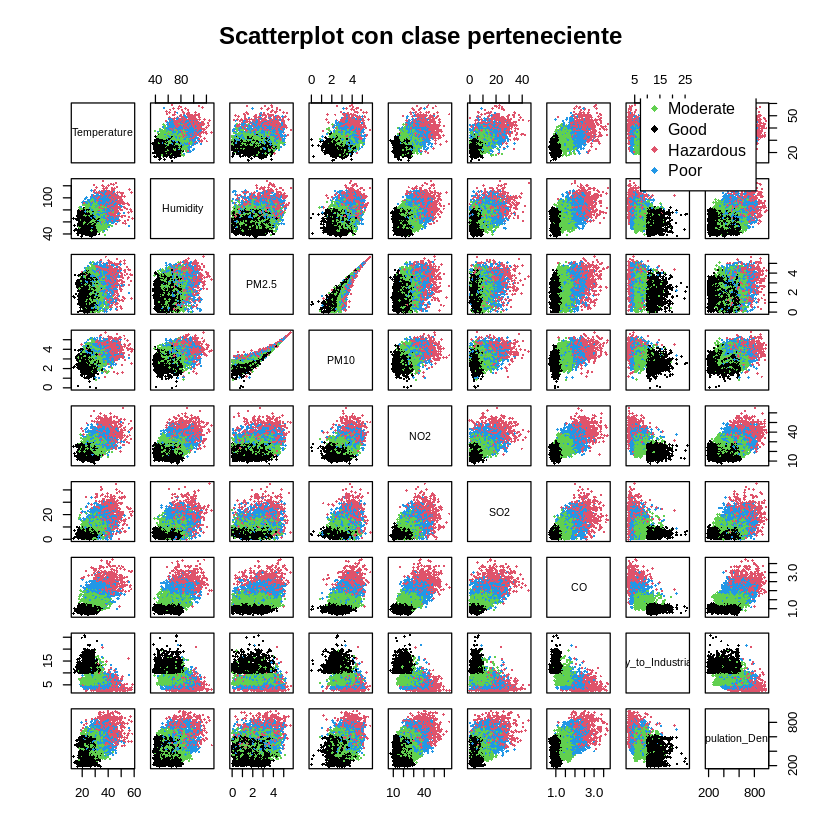

In [15]:
class_names <- unique(data.y)
class_colors <- as.integer(class_names)

pairs(data.x,
      main = "Scatterplot con clase perteneciente",
      col = as.integer(data.y),
      pch = 18,
      cex = 0.5)

legend("topright",
       legend = class_names,
       col = class_colors,
       pch = 18,
       cex = 0.8,
       bg = "white")

A partir de este plot se ve que muchas variables consiguen separar bastante bien a la clase Good, pero que en general el resto de clases tiene bastante superposición tomando de a 2 variables.

Entonces a continuación se realizará una PCA para tener una proyección que maximize la varianza de los datos.

In [16]:
pca <- prcomp(data.x, scale. = TRUE, center = TRUE)

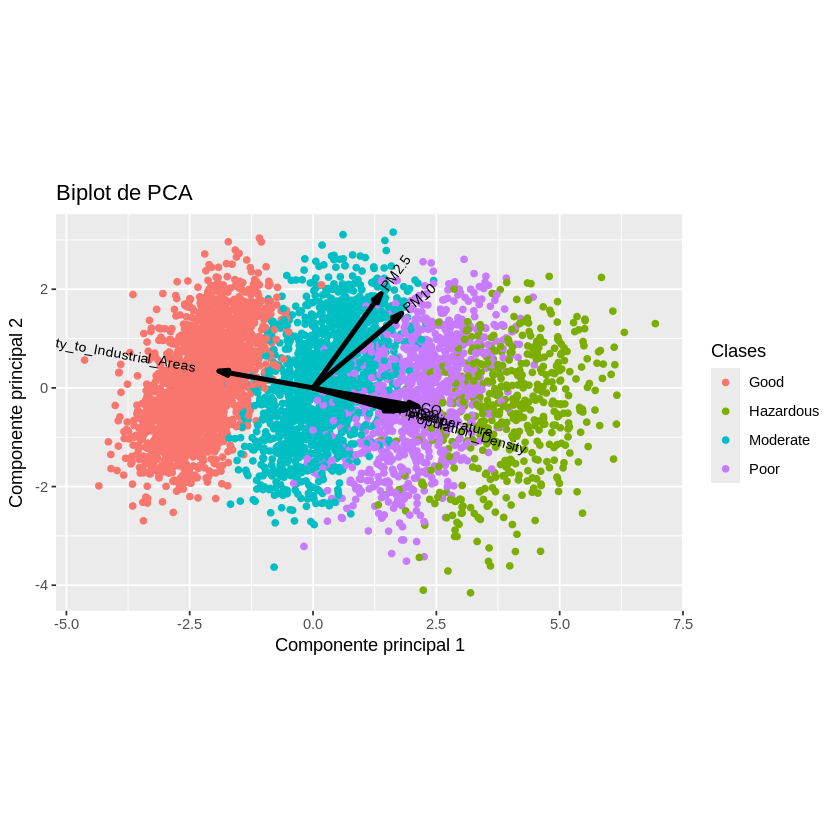

In [17]:
print(ggbiplot(pca, obs.scale = 1, var.scale = 1, groups = data.y) +
      labs(title = "Biplot de PCA",
           x = "Componente principal 1",
           y = "Componente principal 2",
           color = "Clases")
      )

Esta proyección muestra una separación más clara de los datos. Pero aún así se sigue viendo el mismo efecto de que la clase Good está un poco separada, pero el resto (sobre todo Hazardous y Poor) están bastante superpuestas.

Además, analizando el aporte de cada variable a las componentes principales, se ve que los PMs prácticamente no sirven para distinguir las clases.

# Feature selection

Como ya se pudo ver en la PCA, las variables de los PMs no aportan casi nada para distinguir las clases. Esto es un indicio de cuáles deberían tener más importancia.

A continuación se prueban métodos backwards y RFE para obtener un orden de importancia de variables.

In [18]:
library(randomForest)
library(kernlab)
library(MASS)

#---------------------------------------------------------------------------
#random forest error estimation (OOB) for greedy search
#---------------------------------------------------------------------------
rf.est <- function(x.train,y,equalize.classes=TRUE,tot.trees=500,mtry=0)
{
	if(mtry<1) mtry<-floor(sqrt(dim(x.train)[2]))
	prop.samples<-table(y)
	if(equalize.classes) prop.samples<-rep(min(prop.samples),length(prop.samples))
	return( randomForest(x.train,y,mtry=mtry,ntree=tot.trees,sampsize=prop.samples)$err.rate[tot.trees] )
}

#---------------------------------------------------------------------------
#LDA error estimation (LOO) for greedy search
#---------------------------------------------------------------------------
lda.est <- function(x.train,y)
{
	m.lda <- lda(x.train,y,CV=TRUE)
	return(error.rate( y , m.lda$class))
}
error.rate <- function(dataA, dataB) sum( dataA != dataB ) / length(dataB)


#---------------------------------------------------------------------------
#random forest ranking method for rfe.
#---------------------------------------------------------------------------
imp.rf <- function(x.train,y,equalize.classes=TRUE,tot.trees=500,mtry=0)
{
	if(mtry<1) mtry<-floor(sqrt(dim(x.train)[2]))
	prop.samples<-table(y)
	if(equalize.classes) prop.samples<-rep(min(prop.samples),length(prop.samples))

	m.rf<-randomForest(x.train,y,ntree=tot.trees,mtry=mtry,sampsize=prop.samples,importance=TRUE)
	imp.mat<-importance(m.rf)
	imp.col<-dim(imp.mat)[2]-1
	rank.list<-sort(imp.mat[,imp.col],decreasing=FALSE,index=T)
	return(list(feats=rank.list$ix,imp=rank.list$x))
}


#---------------------------------------------------------------------------
#linear svm ranking method for rfe. Using kernlab. Multiclass
#---------------------------------------------------------------------------
imp.linsvm <- function(x.train,y,C=100)
{
	num.feat<-dim(x.train)[2]
	tot.problems<-nlevels(y)*(nlevels(y)-1)/2

	m.svm <- ksvm(as.matrix(x.train), y, type="C-svc",kernel="vanilladot",C=C)

	w<-rep(0.0,num.feat)
	for(i in 1:tot.problems) for(feat in 1:num.feat)
		w[feat]<-w[feat]+abs(m.svm@coef[[i]] %*% m.svm@xmatrix[[i]][,feat])
	rank.list<-sort(w,decreasing=FALSE,index=T)
	return(list(feats=rank.list$ix,imp=rank.list$x))
}


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha




In [19]:
backward.ranking <- function(x,y,method,verbosity=0,... )
{
	max.feat<-dim(x)[2]		#total de features
	num.feat<-max.feat-1			#numero actual de features
	list.feat<-1:max.feat   #lista para guardar los features elegidos, inicializo como llegaron

	class.error<-double(max.feat)   #inicializo el vector para guardar el error de cada modelo
	#para cada i, creo el dataset quitando sólo esa variable, entreno un modelo y le mido el error, que lo guardo en class.error[i]
	for(i in 1:max.feat){
		x.train<-x[,-i,drop=F]
		class.error[i] <- do.call(method, c(list(x.train, y), list(...)) )
	}
	#guardo la variable con minimo error como la última en importancia. Guardo una lista keep.feat con las que me quedan para seguir eliminando.
	best.index <- tail(which(class.error == min(class.error)), 1)
	keep.feat <- list.feat[-best.index]
	list.feat[max.feat] <- best.index

	if(verbosity>1) cat("\nErrors: ", class.error)
	if(verbosity>1) cat("\nFeature removed: ", list.feat[max.feat])
	if(verbosity>1) cat("\nFeatures left: ", keep.feat, "\n")

  #loop principal. A cada paso elimino todas las variables disponibles, de a una, le mido el error y descarto la de minimo error. Hasta llegar a descartar todas.
	while(num.feat>1){
		class.error<-double(num.feat)

		for(i in 1:(num.feat)){
		  removed_features <- c(list.feat[(num.feat+1):max.feat],keep.feat[i])
			x.train<-x[,-removed_features,drop=F]

			class.error[i] <- do.call(method, c(list(x.train, y), list(...)) )
		}

		best.index<-which.min(class.error)
		list.feat[num.feat] <- keep.feat[best.index]

		keep.feat <- keep.feat[-best.index]
		num.feat <- num.feat - 1

		if(verbosity>2) cat("\nErrors:", class.error)
		if(verbosity>2) cat("\nFeature removed:", list.feat[num.feat+1])
		if(verbosity>2) cat("\nFeatures left:", keep.feat, "\n")
	}

	list.feat[1] <- keep.feat[1]

	if(verbosity>3){
		cat("\n---------\nFinal ranking:")
		cat("\nFeatures:",list.feat,"\n")
	}

 	return(list.feat)

}

In [20]:
rfe.ranking <- function(x,y,method,verbosity=0,...)
{
  max.feat<-dim(x)[2]

  list.feat <- 1:max.feat

  list.rank <- 1:max.feat

  for (i in 1:max.feat) {
    x.train<-x[,list.feat,drop=F]

		curr_rank <- do.call(method, c(list(x.train, y), list(...)) )$feats

    last_ranked_feat <- curr_rank[1]

    if (verbosity>1) cat("Removing feature:", list.feat[last_ranked_feat], "\n")

    list.rank[max.feat + 1 - i] <- list.feat[last_ranked_feat]
    list.feat <- list.feat[-last_ranked_feat]
  }

  if (verbosity>2) cat("\nFinal ranking:", list.rank)

  return(list.rank)
}

In [21]:
BACKW.rf <- backward.ranking(data.x,data.y,method="rf.est",tot.trees=100,equalize.classes=F)
BACKW.lda <- backward.ranking(data.x,data.y,method="lda.est")

RFE.rf <- rfe.ranking(data.x,data.y,method="imp.rf",tot.trees=100,equalize.classes=F)
RFE.linsvm <- rfe.ranking(data.x,data.y,method="imp.linsvm")

cat("\nRankings (en orden de importancia decreciente)")
cat("\nBackward con random forest\n", colnames(data.x)[BACKW.rf])
cat("\nBackward con lda\n", colnames(data.x)[BACKW.lda])
cat("\nRFE con random forest\n", colnames(data.x)[RFE.rf])
cat("\nRFE con linear svm\n", colnames(data.x)[RFE.linsvm])

 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  

Rankings (en orden de importancia decreciente)
Backward con random forest
 CO Proximity_to_Industrial_Areas NO2 Temperature SO2 Humidity Population_Density PM10 PM2.5
Backward con lda
 CO NO2 Temperature SO2 Proximity_to_Industrial_Areas Population_Density Humidity PM10 PM2.5
RFE con random forest
 Proximity_to_Industrial_Areas CO Population_Density NO2 Temperature Humidity SO2 PM10 PM2.5
RFE con linear svm
 CO NO2 Temperature PM10 PM2.5 Proximity_to_Industrial_Areas SO2 Humidity Population_Density

Estos resultados se condicen con lo que se visualizó de los datos. En general, estos métodos colocan a los PMs como variables de menor importancia y las que siempre consiguen los primeros puestos son: CO, Proximidad a áreas industriales, NO2.

Si bien es difícil saberlo, esto puede estar relacionado con que en las zonas donde se tomaron los datos, los principales factores que afectan la calidad del aire son las emisiones industriales o de vehículos y no tanto los incendios forestales.

# Clustering

Se realizará la búsqueda de clusters en la PCA. Con el conocimiento que se tiene de los datos, se buscarán, en un principio, 4 clusters "redondos" con k-means.

In [22]:
compare_clustering_solution <- function(class, clusters) {
  cont.table <- table(class, clusters)
  class.match <- matchClasses(as.matrix(cont.table),method="exact")
  print(cont.table[,class.match])
}

Direct agreement: 1 of 4 pairs
Iterations for permutation matching: 6 
Cases in matched pairs: 70.07 %
           clusters
class          1    3    4    2
  Good      1917    0   65    1
  Hazardous    0  477    1   21
  Moderate    77    0  788  628
  Poor         0  522  172  300


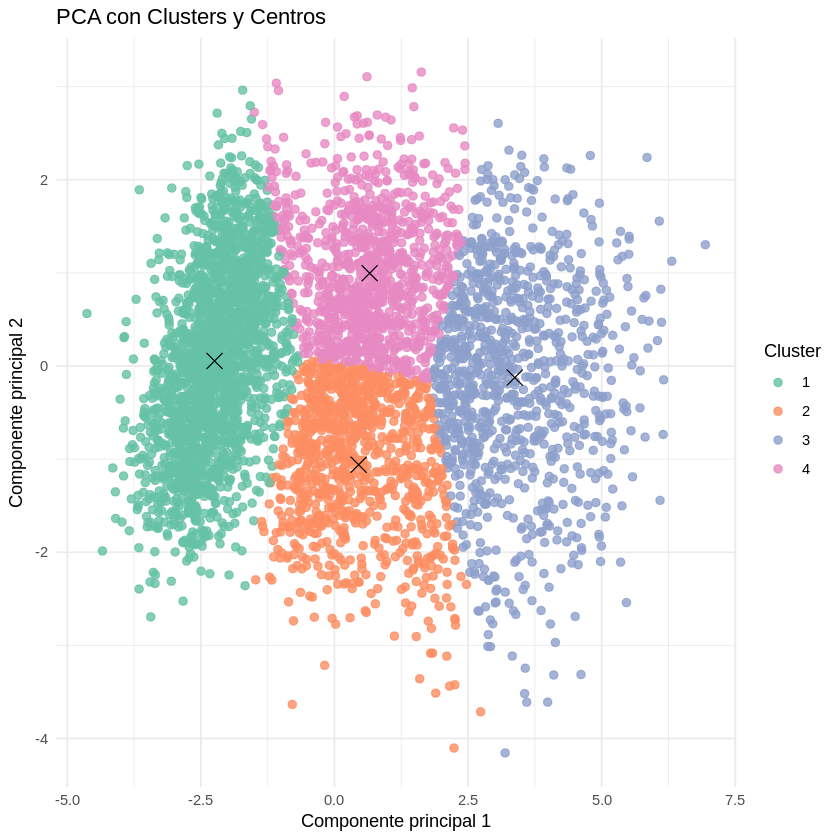

In [23]:
kmeans.data <- kmeans(pca$x[,1:2], centers = 4, nstart = 10)

plot_data <- data.frame(
  PC1 = pca$x[, 1],
  PC2 = pca$x[, 2],
  Cluster = as.factor(kmeans.data$cluster)
)

centroids <- data.frame(
  PC1 = kmeans.data$centers[, 1],
  PC2 = kmeans.data$centers[, 2]
)

ggplot(plot_data, aes(x = PC1, y = PC2, color = Cluster)) +
  geom_point(size = 2, alpha = 0.8) +
  geom_point(data = centroids, aes(x = PC1, y = PC2), color = "black", size = 4, shape = 4) +
  labs(
    title = "PCA con Clusters y Centros",
    x = "Componente principal 1",
    y = "Componente principal 2"
  ) +
  theme_minimal() +
  scale_color_brewer(palette = "Set2")

compare_clustering_solution(data.y, kmeans.data$cluster)

Tal y como se mencionaba anteriormente, la clase Good está mejor separada y por ende se encuentra un cluster que corresponde casi perfectamente a la misma.

Pero para el resto de clusters, no hay un match bueno con alguna clase.

Como el resultado no es tan bueno, se realizará un análisis de cuántos clusters hay "naturalmente" en estos datos.

## Cuantos clusters


In [24]:
compute_gap_statistic <- function(data, max_k = 10, B = 50) {
  n <- nrow(data)

  # Quitamos las columnas que tengan varianza cero
  non_constant_columns <- apply(data, 2, function(col) var(col) > 0)
  data <- data[, non_constant_columns, drop = FALSE]

  if (ncol(data) == 0) {
    stop("All columns have zero variance; cannot perform PCA.")
  }

  # Realizamos una pca en los datos
  pca_result <- prcomp(data, center = TRUE, scale. = TRUE)
  pca_data <- pca_result$x

  # Calculamos la dispersión en los datos originales
  wss <- sapply(1:max_k, function(k) {
    kmeans_result <- kmeans(data, centers = k, nstart = 25)
    sum(kmeans_result$withinss)
  })
  log_wss <- log(wss)

  # Matriz para guardar W*_kb
  ref_log_wss <- matrix(NA, nrow = B, ncol = max_k)

  # Calculamos el bounding box pero de la PCA
  pca_mins <- apply(pca_data, 2, min)
  pca_maxs <- apply(pca_data, 2, max)

  for (b in 1:B) {
    # Genera el dataset de referencia dentro de la bounding box
    ref_pca_data <- sapply(1:ncol(pca_data), function(j) {
      runif(n, min = pca_mins[j], max = pca_maxs[j])
    })

    # Calculamos la dispersión para cada k en el dataset de referencia
    ref_log_wss[b, ] <- sapply(1:max_k, function(k) {
      ref_kmeans <- kmeans(ref_pca_data, centers = k, nstart = 25)
      sum(ref_kmeans$withinss)
    })
  }

  # Calculamos la GAP statistic
  ref_log_wss_mean <- colMeans(log(ref_log_wss))
  gap_stat <- ref_log_wss_mean - log_wss

  ref_log_wss_sd <- apply(log(ref_log_wss), 2, sd)
  gap_se <- sqrt(1 + 1 / B) * ref_log_wss_sd

  # Elegir el k óptimo
  optimal_k <- max_k
  for (k in 1:(max_k - 1)) {
    if (gap_stat[k] >= (gap_stat[k + 1] - gap_se[k + 1])) {
      optimal_k <- k
      break
    }
  }

  results <- list(gap_stat = gap_stat, gap_se = gap_se, optimal_k = optimal_k)
  return(results)
}

In [25]:
plot_gap_result <- function(gap_result) {
  plot(1:10, gap_result$gap_stat, type = "b", pch = 19, col = "blue",
     ylab = "GAP Stat", xlab = "Número de clusters (k)")
  segments(1:10, gap_result$gap_stat - gap_result$gap_se,
          1:10, gap_result$gap_stat + gap_result$gap_se, col = "black")
  abline(v = gap_result$optimal_k, col = "darkgreen", lty = 2)
}

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 248450)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”


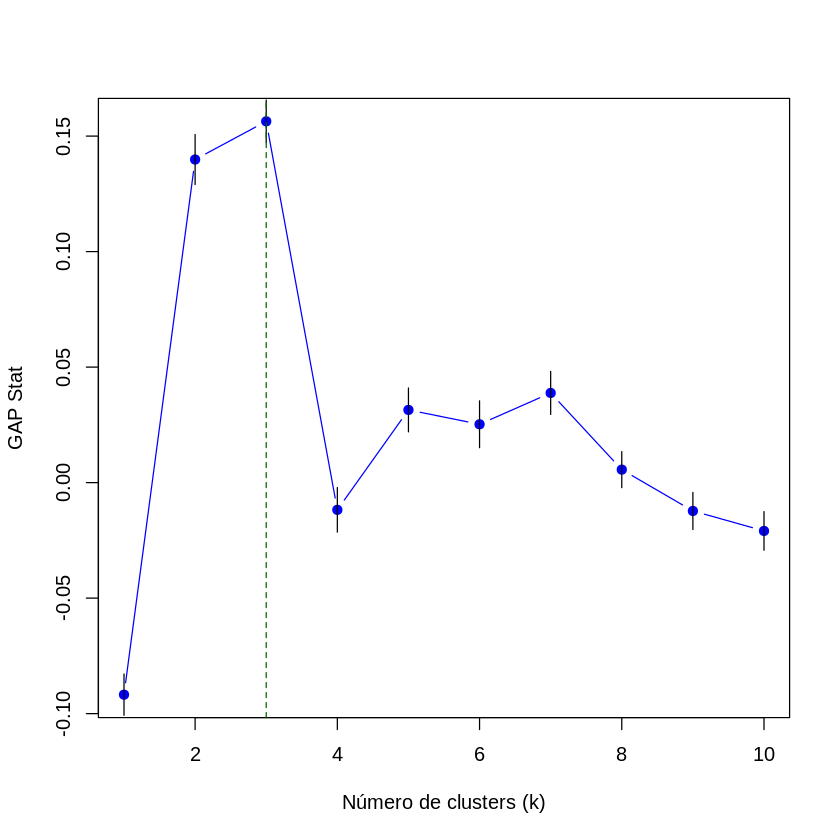

In [26]:
gap_result <- compute_gap_statistic(pca$x[,1:2])

plot_gap_result(gap_result)

La GAP encuentra que el número de clusters es 3 y al agregar el 4to ya no hay una diferencia tan significativa con respecto a clusterizar datos uniformes.

Esto, agregado a que la solución de kmeans con 4 clusters no es buena, lleva a pensar cómo se vería con 3 clusters. Para ello se realiza kmeans con 3 clusters y además se compara con la clase real uniendo las clases Hazardous con Poor (que son las que se veían más mezcladas).

In [27]:
data.y.joined <- data.y

levels(data.y.joined) <- gsub("Hazardous", "Bad", levels(data.y.joined))
levels(data.y.joined) <- gsub("Poor", "Bad", levels(data.y.joined))

table(data.y.joined)

data.y.joined
    Good      Bad Moderate 
    1983     1493     1493 

Además como subproducto de esto las clases quedan más balanceadas.

Direct agreement: 3 of 3 pairs
Cases in matched pairs: 90.22 %
          clusters
class         1    2    3
  Good     1960    0   23
  Bad         0 1146  347
  Moderate  106   10 1377


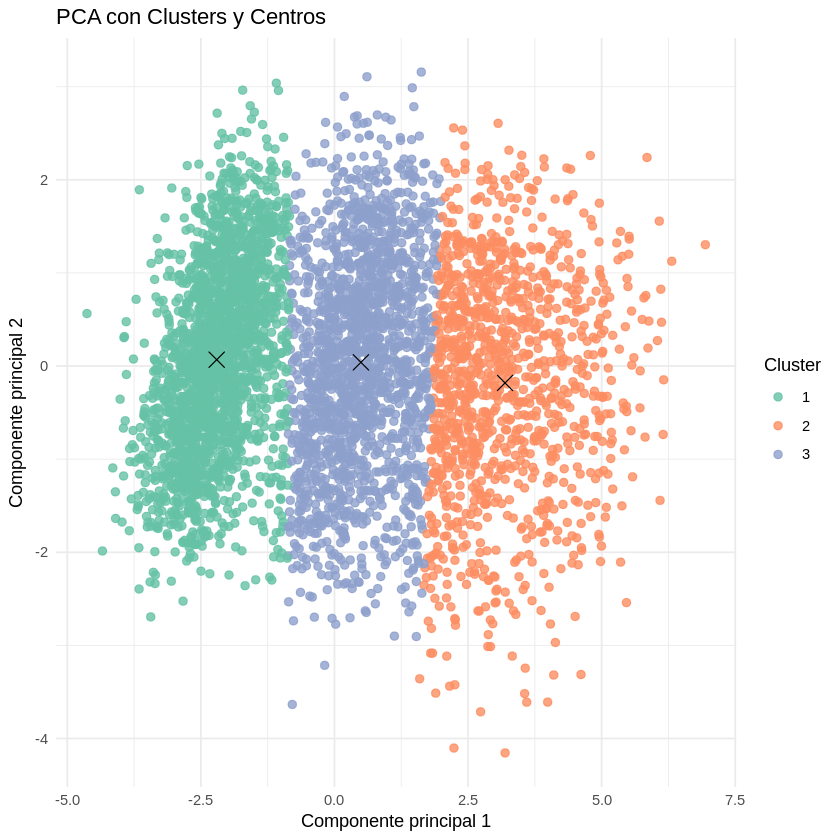

In [28]:
kmeans.data <- kmeans(pca$x[,1:2], centers = 3, nstart = 10)

plot_data <- data.frame(
  PC1 = pca$x[, 1],
  PC2 = pca$x[, 2],
  Cluster = as.factor(kmeans.data$cluster)
)

centroids <- data.frame(
  PC1 = kmeans.data$centers[, 1],
  PC2 = kmeans.data$centers[, 2]
)

ggplot(plot_data, aes(x = PC1, y = PC2, color = Cluster)) +
  geom_point(size = 2, alpha = 0.8) +
  geom_point(data = centroids, aes(x = PC1, y = PC2), color = "black", size = 4, shape = 4) +
  labs(
    title = "PCA con Clusters y Centros",
    x = "Componente principal 1",
    y = "Componente principal 2"
  ) +
  theme_minimal() +
  scale_color_brewer(palette = "Set2")

compare_clustering_solution(data.y.joined, kmeans.data$cluster)

Los clusters, en este caso, se corresponden mucho mejor a las clases.

# Clasificación

Primeramente, se dividen los datos en conjuntos de train (60%), validation (20%) y test (20%).

In [29]:
data.x.mat <- as.matrix(data.x)
data.y.mat <- as.matrix(as.factor(data.y))

train_index <- createDataPartition(data.y.mat, p = 0.6, list = FALSE)

x.data.train <- data.x.mat[train_index,]
y.data.train <- as.factor(data.y.mat[train_index,])

remaining_data_x <- data.x.mat[-train_index,]
remaining_data_y <- data.y.mat[-train_index, , drop = FALSE]

validation_index <- createDataPartition(remaining_data_y, p = 0.5, list = FALSE)

x.data.validation <- remaining_data_x[validation_index, ]
y.data.validation <- as.factor(remaining_data_y[validation_index, ])
x.data.test <- remaining_data_x[-validation_index, ]
y.data.test <- as.factor(remaining_data_y[-validation_index, , drop = FALSE])

## RF

Se entrena un clasificador Random Forest con un número de árboles suficiente para que dé un buen resultado. Para el entrenamiento se utilizan todos los datos, tomando como error a la estimación OOB del método, que es buena.

In [30]:
model <- randomForest(data.x, data.y, importance = TRUE, ntree = 500)

In [31]:
model


Call:
 randomForest(x = data.x, y = data.y, ntree = 500, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 4.59%
Confusion matrix:
          Good Hazardous Moderate Poor class.error
Good      1981         0        2    0 0.001008573
Hazardous    0       424        0   75 0.150300601
Moderate     4         0     1448   41 0.030140656
Poor         0        47       59  888 0.106639839

Se consigue un error menor al 5%.
Además cabe notar que las clases que más error tuvieron fueron Hazardous y Poor. Las mismas que, al unirlas, hicieron que el método de clustering consiga un resultado mucho mejor.

## Boosting

In [32]:
require(xgboost)

boosting.predict <- function(x.train, y.train, x.validation, y.validation, complexity) {
  XGB.nrounds=500
  XGB.eta=0.1
  XGB.max.depth=complexity

  m.xgb <- xgboost(
    data = x.train,
    label = as.integer(y.train) - 1,
    objective = "multi:softmax",
    num_class = 4,
    nrounds = XGB.nrounds,
    early_stopping_rounds = 1000,
    eta = XGB.eta,
    max.depth = XGB.max.depth,
    colsample_bytree = 1,
    verbose = 0,
    subsample = 1
  )

  y.pred <- predict(m.xgb, x.validation)

  error <- mean(y.pred != (as.integer(y.validation) - 1))
  return(list(error = error, model = m.xgb))
}

Loading required package: xgboost



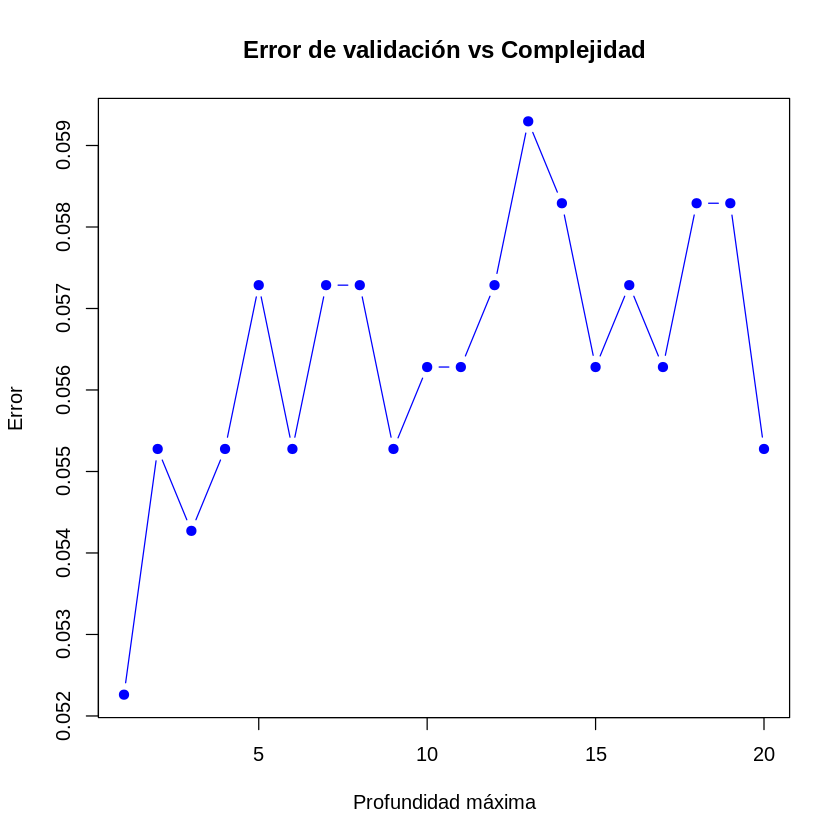

In [33]:
validation.error <- 1:20

min_error <- 1
best_model <- NULL
for (complexity in 1:20) {
  result <- boosting.predict(x.data.train, y.data.train, x.data.validation, y.data.validation, complexity)
  validation.error[complexity] <- result$error
  if (result$error < min_error) {
    best_model <- result$model
    min_error <- result$error
  }
}

plot(
  1:20, validation.error,
  type = "b",
  col = "blue",
  pch = 19,
  xlab = "Profundidad máxima",
  ylab = "Error",
  main = "Error de validación vs Complejidad"
)

Se ajusta la profundidad de los árboles utilizando el conjunto de validación.

In [34]:
require(xgboost)

y.pred <- predict(best_model, x.data.test)

class_names <- levels(as.factor(y.data.train))
y.pred.names <- class_names[y.pred + 1]
y.actual.names <- class_names[as.integer(as.factor(y.data.test))]

error <- mean(y.pred.names != y.actual.names)
cat("Error rate:", round(error * 100, 2), "%\n")

confusion_matrix <- table(Predicted = y.pred.names, Actual = y.actual.names)
cat("\nConfusion Matrix:\n")
print(confusion_matrix)

Error rate: 4.74 %

Confusion Matrix:
           Actual
Predicted   Good Hazardous Moderate Poor
  Good       395         0        0    0
  Hazardous    0        90        0    8
  Moderate     1         0      288   19
  Poor         0         9       10  171


Se ejecuta el método XGBoost, obteniendo un error similar de alrededor del 5%. Una vez más, las clases que más error introducen son Hazardous y Poor.

## SVM

In [35]:
find_best_svm_polynomial_model <- function(x.train, y.train, x.validation, y.validation, C_values, degrees, scale) {
  best_model <- NULL
  best_accuracy <- 0

  for (C in C_values) {
    for (degree in degrees) {
      model <- svm(x=x.train, y=y.train, type = 'C-classification', scale = scale,
                  kernel = "polynomial", cost = C, degree = degree)

      predictions <- predict(model, x.validation)

      accuracy <- mean(predictions == y.validation)

      print(paste("Tried parameters: C =", C, ", degree =", degree))
      print(paste("Accuracy: ", round(accuracy*100,2), "%"))
      flush.console()
      if (accuracy > best_accuracy) {
        best_accuracy <- accuracy
        best_model <- model
      }
    }
  }
  return(best_model)
}

In [36]:
optimal_svm_polynomial_model <- function(x.train, y.train, x.validation, y.validation, scale = FALSE) {
  C_values <- 10^(-5:5)
  degrees <- 1:5

  model <- find_best_svm_polynomial_model(x.train, y.train, x.validation, y.validation, C_values, degrees, scale)

  best_cost <- model$cost
  best_degree <- model$degree

  narrowed_C_values <- seq(from = best_cost/10, to = best_cost*10, length.out = 10)
  narrowed_C_values <- c(narrowed_C_values, best_cost)

  model <- find_best_svm_polynomial_model(x.train, y.train, x.validation, y.validation, narrowed_C_values, c(best_degree), scale)

  return(model)
}

In [37]:
model <- optimal_svm_polynomial_model(x.data.train, y.data.train, x.data.validation, y.data.validation)

[1] "Tried parameters: C = 1e-05 , degree = 1"
[1] "Accuracy:  50.55 %"
[1] "Tried parameters: C = 1e-05 , degree = 2"
[1] "Accuracy:  92.06 %"
[1] "Tried parameters: C = 1e-05 , degree = 3"
[1] "Accuracy:  88.64 %"
[1] "Tried parameters: C = 1e-05 , degree = 4"
[1] "Accuracy:  64.32 %"
[1] "Tried parameters: C = 1e-05 , degree = 5"
[1] "Accuracy:  85.63 %"
[1] "Tried parameters: C = 1e-04 , degree = 1"
[1] "Accuracy:  76.18 %"
[1] "Tried parameters: C = 1e-04 , degree = 2"
[1] "Accuracy:  93.57 %"
[1] "Tried parameters: C = 1e-04 , degree = 3"
[1] "Accuracy:  76.28 %"
[1] "Tried parameters: C = 1e-04 , degree = 4"
[1] "Accuracy:  63.32 %"
[1] "Tried parameters: C = 1e-04 , degree = 5"
[1] "Accuracy:  85.33 %"
[1] "Tried parameters: C = 0.001 , degree = 1"
[1] "Accuracy:  85.23 %"
[1] "Tried parameters: C = 0.001 , degree = 2"
[1] "Accuracy:  91.46 %"
[1] "Tried parameters: C = 0.001 , degree = 3"
[1] "Accuracy:  75.68 %"
[1] "Tried parameters: C = 0.001 , degree = 4"
[1] "Accuracy:  6

In [38]:
predictions <- predict(model, x.data.test)

predictions.names <- as.character(predictions)
actual.names <- as.character(y.data.test)

accuracy <- sum(predictions.names == actual.names) / length(actual.names) * 100

print(model)
print(paste("Accuracy:", round(accuracy, 2), "%"))

confusion_matrix <- table(Predicted = predictions.names, Actual = actual.names)
cat("\nConfusion Matrix:\n")
print(confusion_matrix)


Call:
svm.default(x = x.train, y = y.train, scale = scale, type = "C-classification", 
    kernel = "polynomial", degree = degree, cost = C)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  0.00045 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  451

[1] "Accuracy: 93.14 %"

Confusion Matrix:
           Actual
Predicted   Good Hazardous Moderate Poor
  Good       396         0        2    0
  Hazardous    0        89        0   18
  Moderate     0         0      287   29
  Poor         0        10        9  151


Se consigue un error de alrededor del 7%. Una vez más las clases con más error fueron Poor, Hazardous y Moderate.